In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [4]:
#Initializing the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

#Fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
# Predicting the training data
y_pred = clf.predict(X_train)


In [6]:
#Accuracy of the model on training data
acc_train = accuracy_score(y_train, y_pred)
print("========================================")
print("=   Accuracy of Training Data          =")
print("========================================")
print("= Accuracy Score is    :", acc_train*100)
print("========================================")


=   Accuracy of Training Data          =
= Accuracy Score is    : 100.0


In [7]:
#Predicting on cross validation data
y_pred_cross = cross_val_predict(clf, X_train, y_train, cv=10)


In [8]:
# The overall accuracy from cross-validation
cv_accuracy = accuracy_score(y_train, y_pred_cross)
print(f'Cross-Validated Accuracy on Training Set: {cv_accuracy}')
#Accuracy of the model cross validation data
print("========================================")
print("=   Accuracy of Training Data          =")
print("========================================")
print("= Accuracy Score is    :", round(cv_accuracy*100,2))
print("========================================")

Cross-Validated Accuracy on Training Set: 0.6691434468524252
=   Accuracy of Training Data          =
= Accuracy Score is    : 66.91


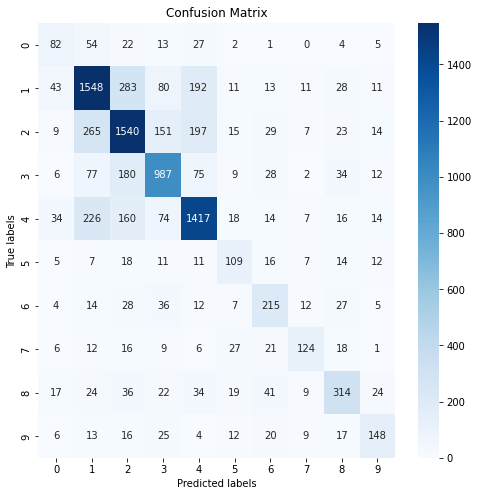

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred_cross)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [10]:
#Classification Report
print(classification_report(y_train, y_pred_cross))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39       210
           1       0.69      0.70      0.69      2220
           2       0.67      0.68      0.68      2250
           3       0.70      0.70      0.70      1410
           4       0.72      0.72      0.72      1980
           5       0.48      0.52      0.50       210
           6       0.54      0.60      0.57       360
           7       0.66      0.52      0.58       240
           8       0.63      0.58      0.61       540
           9       0.60      0.55      0.57       270

    accuracy                           0.67      9690
   macro avg       0.61      0.60      0.60      9690
weighted avg       0.67      0.67      0.67      9690



In [11]:
# Calculating the TPR, FPR, Precision and F1 Score
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (FP + FN + TP)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
Precision = TP / (TP + FP)
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

In [14]:
# Keeping results into a dataframe
results = pd.DataFrame({'TP Rate': TPR, 'FP Rate': FPR, 'Precision': Precision, 'F1_Score': F1_Score})
print(results)

    TP Rate   FP Rate  Precision  F1_Score
0  0.390476  0.013713   0.386792  0.388626
1  0.697297  0.092637   0.691071  0.694170
2  0.684444  0.102016   0.669856  0.677072
3  0.700000  0.050845   0.700994  0.700497
4  0.715657  0.072374   0.717468  0.716561
5  0.519048  0.012658   0.475983  0.496583
6  0.597222  0.019614   0.540201  0.567282
7  0.516667  0.006772   0.659574  0.579439
8  0.581481  0.019781   0.634343  0.606763
9  0.548148  0.010403   0.601626  0.573643
